# Propagación de la afinidad

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [2]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle

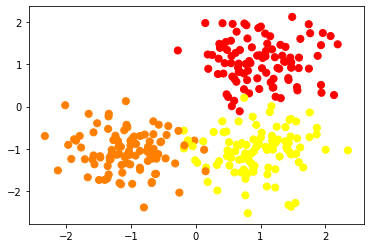

In [4]:
plt.scatter(X[:,0], X[:,1],c=labels, s=50, cmap="autumn")

In [5]:
af = AffinityPropagation(preference=-50).fit(X)

In [8]:
cluster_center_ids = af.cluster_centers_indices_

In [10]:
labels = af.labels_

In [11]:
n_clust = len(cluster_center_ids)
n_clust

3

In [12]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: {}".format(n_clust))
    print("Homogeneidad: {:.3f}".format(metrics.homogeneity_score(labels, clust_labels)))
    print("Completitud: {:.3f}".format(metrics.completeness_score(labels, clust_labels)))
    print("V-measure: {:.3f}".format(metrics.v_measure_score(labels, clust_labels)))
    print("R² ajustado: {:.3f}".format(metrics.adjusted_rand_score(labels, clust_labels)))
    print("Información mútua ajustada: {:.3f}".format(metrics.adjusted_mutual_info_score(labels, clust_labels)))
    print("Coeficientes de la silueta: {:.3f}".format(metrics.silhouette_score(X, labels, metric="sqeuclidean")))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels == k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col+'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
    
    plt.title("Número estimado de clusters {}".format(n_clust))

Número estimado de clusters: 3
Homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R² ajustado: 1.000
Información mútua ajustada: 1.000
Coeficientes de la silueta: 0.753


/usr/lib64/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


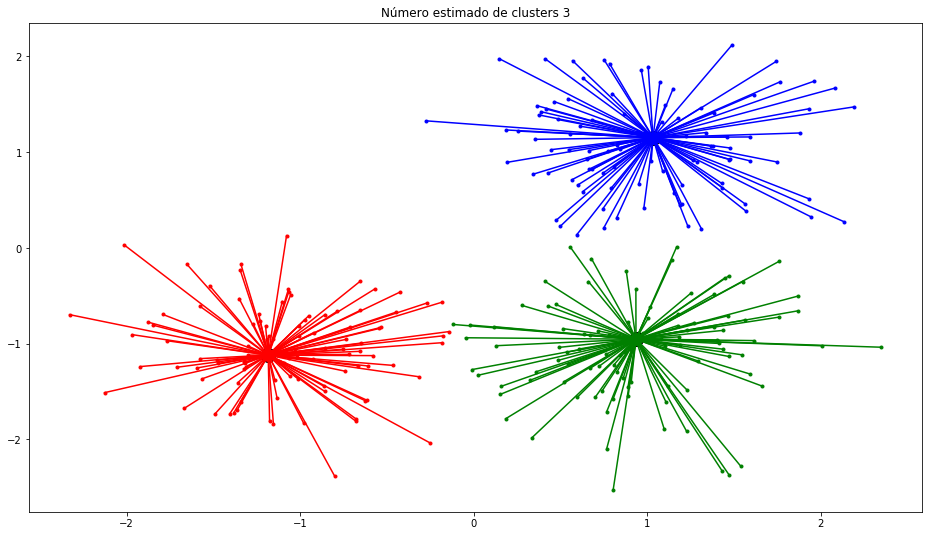

In [14]:
report_affinity_propagation(X)